# HARRIS CORNER DETECTION AND HOUGH TRANSFORM

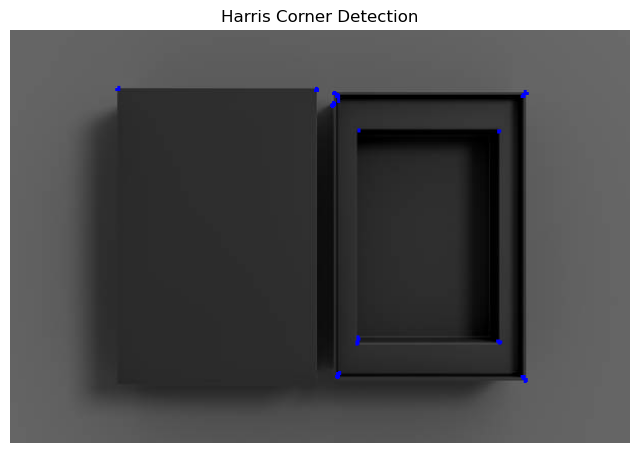

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("C:/Users/student/Downloads/istockphoto-1472606574-612x612.jpg", cv2.IMREAD_GRAYSCALE)

dst = cv2.cornerHarris(image, 2, 3, 0.04)

dst = cv2.dilate(dst, None)

image_with_corners = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)  
image_with_corners[dst > 0.01 * dst.max()] = [0, 0, 255]  

plt.figure(figsize=(8, 8))
plt.imshow(image_with_corners)
plt.title('Harris Corner Detection')
plt.axis('off')  
plt.show()


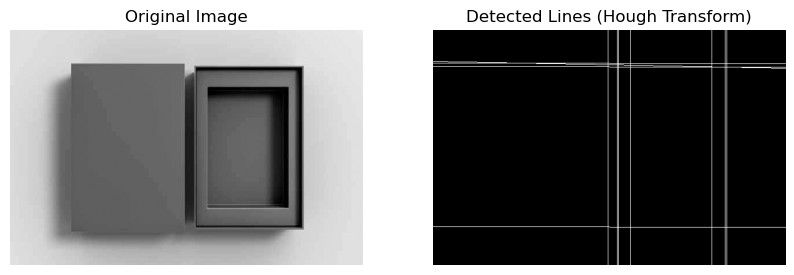

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("C:/Users/student/Downloads/istockphoto-1472606574-612x612.jpg", cv2.IMREAD_GRAYSCALE)

edges = cv2.Canny(image, 50, 150, apertureSize=3)


lines = cv2.HoughLines(edges, 1, np.pi / 180, 150)  

line_image = np.zeros_like(image)  

if lines is not None:
    for line in lines:
        r, theta = line[0]  
        a = np.cos(theta)  
        b = np.sin(theta) 
        x0 = a * r  # x0
        y0 = b * r  # y0
        x1 = int(x0 + 1000 * (-b))  
        y1 = int(y0 + 1000 * (a))  
        x2 = int(x0 - 1000 * (-b))  
        y2 = int(y0 - 1000 * (a)) 
        
        cv2.line(line_image, (x1, y1), (x2, y2), (255), 1)  

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')  

plt.subplot(1, 2, 2)
plt.imshow(line_image, cmap='gray')
plt.title('Detected Lines (Hough Transform)')
plt.axis('off') 

plt.show()


In [ ]:
# 

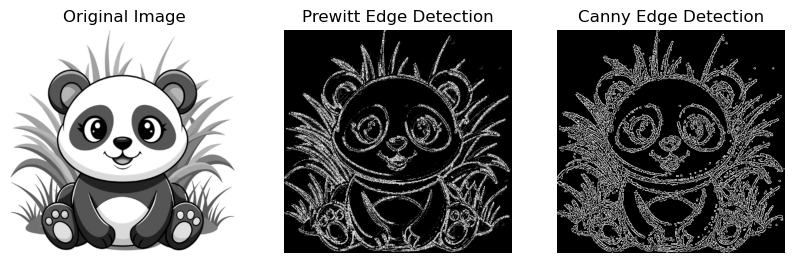

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("C:/Users/student/Downloads/panda.png",cv2.IMREAD_GRAYSCALE)

prewitt_kernel_x = np.array([[ -1, 0, 1],
                             [ -1, 0, 1],
                             [ -1, 0, 1]])

prewitt_kernel_y = np.array([[ -1, -1, -1],
                             [ 0,  0,  0],
                             [ 1,  1,  1]])

gradient_x = cv2.filter2D(image, -1, prewitt_kernel_x)
gradient_y = cv2.filter2D(image, -1, prewitt_kernel_y)

gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

gradient_magnitude = np.uint8(np.clip(gradient_magnitude, 0, 255))


normalized_gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

canny_edges = cv2.Canny(normalized_gradient_magnitude, 50, 150)  # Adjust thresholds as necessary

plt.figure(figsize=(10, 7))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()


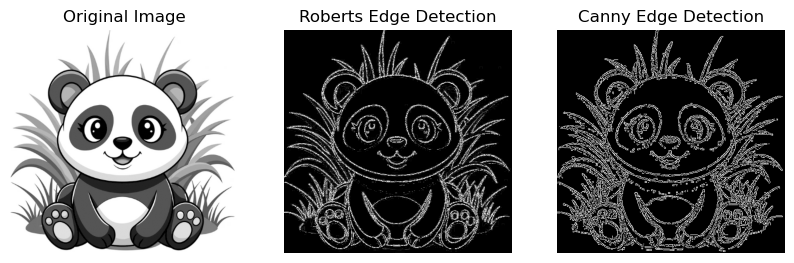

In [25]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread("C:/Users/student/Downloads/panda.png",cv2.IMREAD_GRAYSCALE)

roberts_kernel_x = np.array([[1, 0],
                              [0, -1]])

roberts_kernel_y = np.array([[0, 1],
                              [-1, 0]])

gradient_x = cv2.filter2D(image, -1, roberts_kernel_x)
gradient_y = cv2.filter2D(image, -1, roberts_kernel_y)

gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)

gradient_magnitude = np.uint8(np.clip(gradient_magnitude, 0, 255))

normalized_gradient_magnitude = cv2.normalize(gradient_magnitude, None, 0, 255, cv2.NORM_MINMAX)

canny_edges = cv2.Canny(normalized_gradient_magnitude, 50, 150)  

plt.figure(figsize=(10, 7))

plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title('Roberts Edge Detection')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Detection')
plt.axis('off')

plt.show()
